# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('output/q6_load_this_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site
site_summary = summarize_by_group(df, "site", {"age": "mean", "bmi": "mean", "systolic_bp": "mean", "diastolic_bp": "mean"})
print(site_summary)

              age        bmi  systolic_bp  diastolic_bp
site                                                   
site a  81.208390  26.261570   117.341340     73.529432
site b  80.453322  26.137668   117.125561     73.298002
site c  80.756392  26.335215   117.937771     73.648336
site d  80.759494  26.323917   117.892738     73.604930
site e  80.427729  26.327237   117.481809     73.720747


In [3]:
# TODO: Count by intervention group
intervention_group_summary = summarize_by_group(df, "intervention_group",{"patient_id": "count"})
print(intervention_group_summary)

                    patient_id
intervention_group            
control                   3337
treatment a               3321
treatment b               3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility
overall_stats = summarize_by_group(df, "site", {'age':'mean', 'bmi': 'mean', 'patient_id': 'count'})
print(overall_stats)

              age        bmi  patient_id
site                                    
site a  81.208390  26.261570        2956
site b  80.453322  26.137668        2453
site c  80.756392  26.335215        2073
site d  80.759494  26.323917        1501
site e  80.427729  26.327237        1017


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations
multiple_agg = summarize_by_group(df, "site", {"age": ["mean", "std", "min", "max"], "bmi": ["mean", "std"], "systolic_bp": ["mean", "median"]})
print(multiple_agg)
df['outcome_cvd_rate'] = df['outcome_cvd'].map({'yes': 1, 'no': 0})
intervention_comparison = summarize_by_group(df, "intervention_group", {"outcome_cvd_rate": "mean", "adverse_events": "mean", "adherence_pct": "mean"})
print(intervention_comparison)

              age                                bmi           systolic_bp  \
             mean        std   min    max       mean       std        mean   
site                                                                         
site a  81.208390  13.569270  44.0  100.0  26.261570  3.737312  117.341340   
site b  80.453322  13.313755  45.0  100.0  26.137668  3.630759  117.125561   
site c  80.756392  13.225545  43.0  100.0  26.335215  3.703805  117.937771   
site d  80.759494  13.357649  45.0  100.0  26.323917  3.661309  117.892738   
site e  80.427729  13.600708  44.0  100.0  26.327237  3.629155  117.481809   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  117.0  
site d  117.0  
site e  117.0  
                    outcome_cvd_rate  adverse_events  adherence_pct
intervention_group                                                 
control                     0.336530        0.068924      60.830686
treatment a                 0.319482       

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [6]:
# TODO: Intervention group comparisons
# intervention_group_stats = summarize_by_group(df, "intervention_group", {"adherence_pct": "mean", "outcome_cvd": "mean"})
df['dropout_rate'] = df['dropout'].map({'Yes': 1, 'No': 0})
intervention_group_outcome = summarize_by_group(df, "intervention_group", {"outcome_cvd_rate": "mean"})
print(intervention_group_outcome)
intervention_group_adherence = summarize_by_group(df, "intervention_group", {"adherence_pct": "mean"})
print(intervention_group_adherence)
cross_tabulation = pd.crosstab(df['intervention_group'], df['dropout'])
print(cross_tabulation)

df_sorted = df.sort_values(by='cholesterol_total', ascending=False).head(10)
stats_for_top_10 = summarize_by_group(df_sorted, "age_group", {"cholesterol_total": ["mean", "max"], "bmi": "mean"})
print(stats_for_top_10)



                    outcome_cvd_rate
intervention_group                  
control                     0.336530
treatment a                 0.319482
treatment b                 0.333633
                    adherence_pct
intervention_group               
control                 60.830686
treatment a             60.474255
treatment b             61.149013
dropout               No  Yes
intervention_group           
control             2831  506
treatment a         2831  490
treatment b         2871  471
          cholesterol_total           bmi
                       mean    max   mean
age_group                                
55-69            296.750000  301.0  27.90
70+              299.333333  315.0  32.05


Text(0.5, 0, 'Intervention Group')

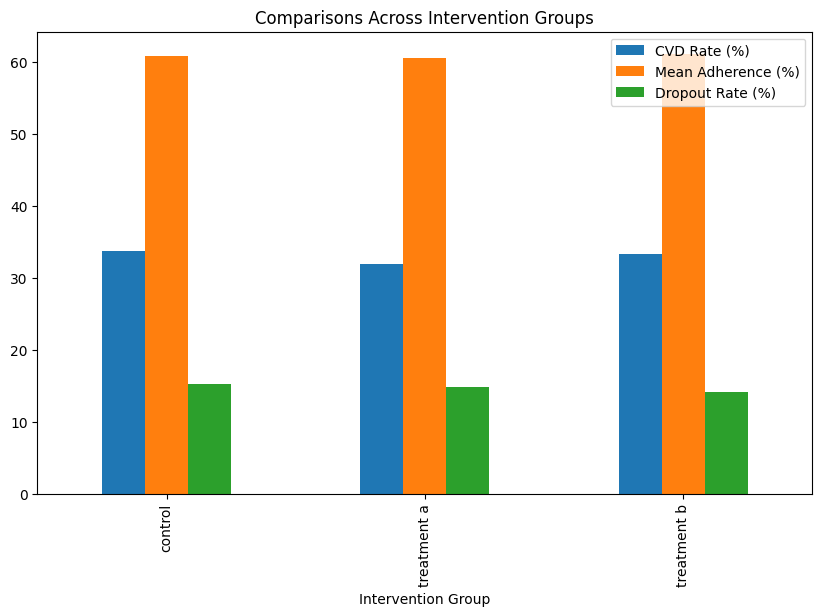

In [7]:
# TODO: Visualization
summary = df.groupby('intervention_group').agg({
    'outcome_cvd_rate': 'mean', 
    'adherence_pct': 'mean',  
    'dropout_rate': 'mean'      
}).reset_index()

summary['outcome_cvd_rate'] *= 100
summary['dropout_rate'] *= 100

# Rename columns for clarity
summary.rename(columns={
    'outcome_cvd_rate': 'CVD Rate (%)',
    'adherence_pct': 'Mean Adherence (%)',
    'dropout_rate': 'Dropout Rate (%)'
}, inplace=True)

summary.plot(x='intervention_group', y=['CVD Rate (%)', 'Mean Adherence (%)', 'Dropout Rate (%)'], kind='bar', figsize=(10, 6))
plt.title("Comparisons Across Intervention Groups")
plt.xlabel("Intervention Group")


## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [8]:
# TODO: Save summary outputs
overall_stats.to_csv("output/q7_site_summary", index=False)
intervention_comparison.to_csv("output/q7_intervention_comparison.csv")

with open('output/q7_analysis_report.txt', 'w') as f:
    
    f.write("Analysis Report\n")
    f.write("=================\n\n")
    
    f.write("Mean CVD Outcome CVD by Intervention Group:\n")
    f.write(intervention_group_outcome.to_string(index=False))
    f.write("\nWe see that for the control group, around 33.6 percent of patients experienced a cardiovascular event. For the Treatment B group, around 33.3 percent of patients experineced a cardiovasscular event (this is similar to the control group). For the Treatment A group, around 31.9 percent of patients experienced a cardiovascular event, which is lower than both the Control and Treatment B groups. This suggests that Treatment A offers a slight improvement over control in reducing the incidence of cardiovascular events\n")
    f.write("\n\n")
    
    f.write("Mean Adherence by Intervention Group:\n")
    f.write(intervention_group_adherence.to_string(index=False))
    f.write("\nWe see that for the control group, around 60.8 percent of patients experienced a cardiovascular event. For the Treatment B group, around 61.1 percent of patients experineced a cardiovasscular event (this is similar to the control group). For the Treatment A group, around 60.5 percent of patients experienced a cardiovascular event. The CVD Rate among all three groups is fairly similar, indicating that Treatment A and Treatment B don't offer a significant improvement beyond the control.\n")
    f.write("\n\n")
    
    f.write("Dropout Counts by Intervention Group:\n")
    f.write(cross_tabulation.to_string())
    f.write("\nWe see that for the control group, 506 patients dropped out of the study. For Treatment A, 490 patients dropped out of the study. For Treatment B, 471 patients dropped out of the study.\n")
    f.write("\n\n")
    

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Treatment A seems to offer an improvement over the control in reducing the rate of participants that experienced a cardiovascular event. 
2. The adherence for all three groups seems to be similar. 
3. Treatment A had the second-highest amount of patients drop out of the study, but had lower amounts of patients drop out than the control. This means that Treatment A is fairly effective and Treatment A has fairly strong participant adherence and retention. Therefore, Treatment A seems fairly viable.